In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# verfions les valeurs manquantes
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

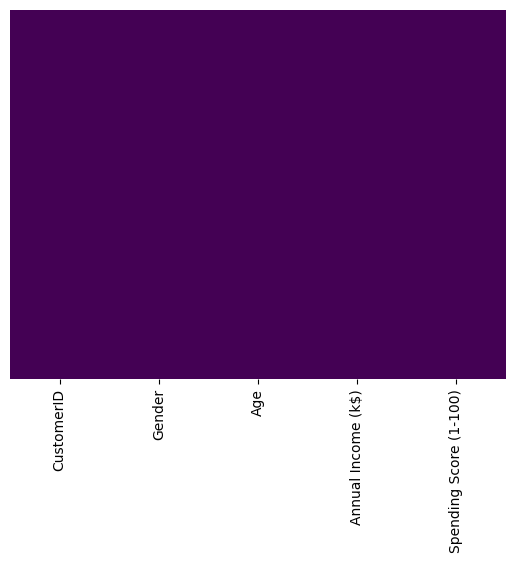

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [8]:
# Encodage des variables catégoriques comme gender en numérique
from sklearn.preprocessing import LabelEncoder
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [9]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [10]:
# Normalisation
from sklearn.preprocessing import StandardScaler
features = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaled_features = StandardScaler().fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

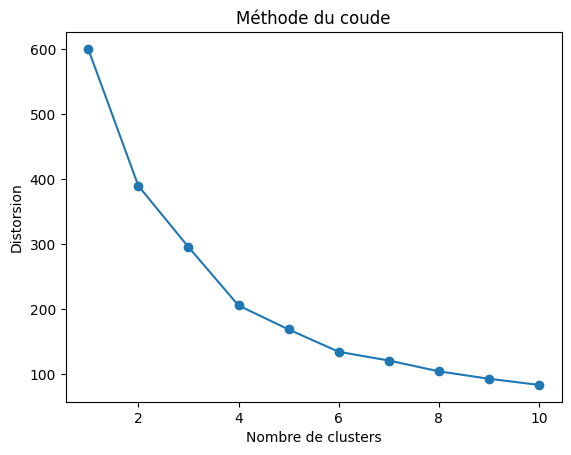

In [11]:
# Clustering avec KMeans
# Recherche de nombre optimal de clusters
from sklearn.cluster import KMeans

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distorsion')
plt.title('Méthode du coude')
plt.show()


In [12]:
# Le nombre optimal de clusers est 4

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Nouveau dimenssion de l'ensemble de données
data.shape

(200, 6)

In [15]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
5,6,0,22,17,76,2
6,7,0,35,18,6,3
7,8,0,23,18,94,2
8,9,1,64,19,3,3
9,10,0,30,19,72,2


In [16]:
data['Cluster'].mode()

0    3
Name: Cluster, dtype: int32

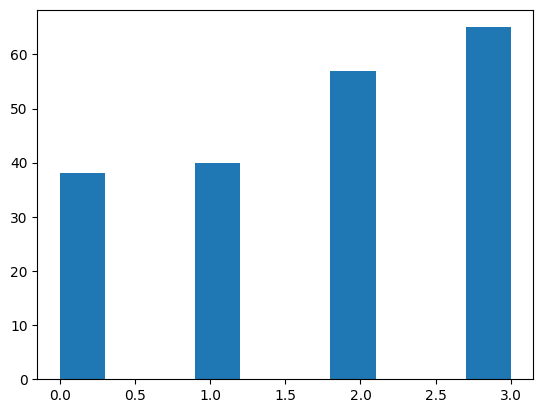

In [17]:
plt.hist(data['Cluster'])
plt.show()

In [18]:
data_3 = data[data['Cluster']==3]
data_3.shape

(65, 6)

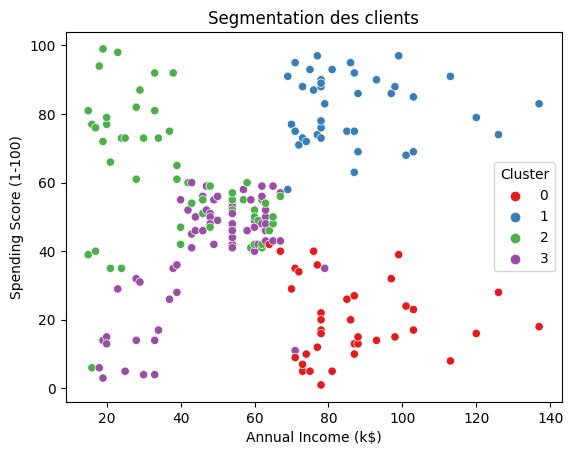

In [19]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Segmentation des clients')
plt.show()


# Amélioration du model


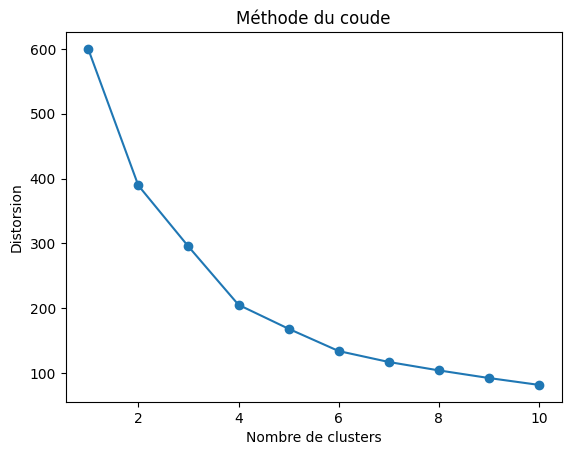

In [20]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init=20)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distorsion')
plt.title('Méthode du coude')
plt.show()

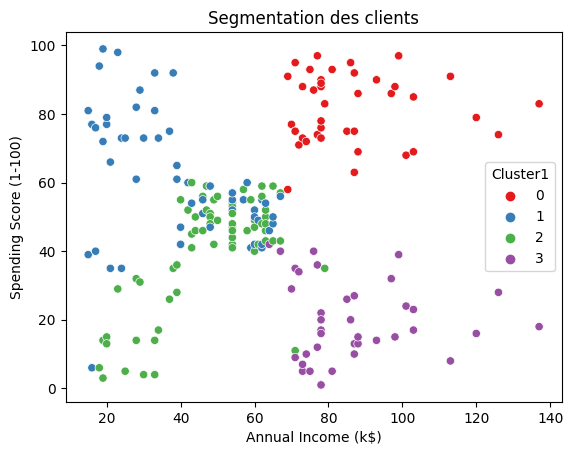

In [21]:
kmeans = KMeans(n_clusters=4, init='random', random_state=42, n_init=20)
data['Cluster1'] = kmeans.fit_predict(scaled_features)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster1', data=data, palette='Set1')
plt.title('Segmentation des clients')
plt.show()


In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(scaled_features)


In [23]:
clusters

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

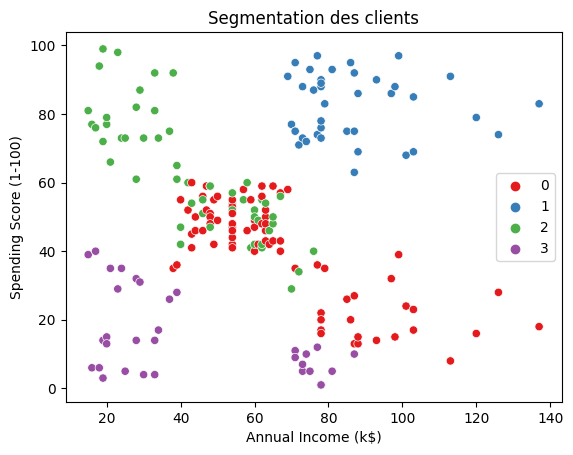

In [24]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters, data=data, palette='Set1')
plt.title('Segmentation des clients')
plt.show()


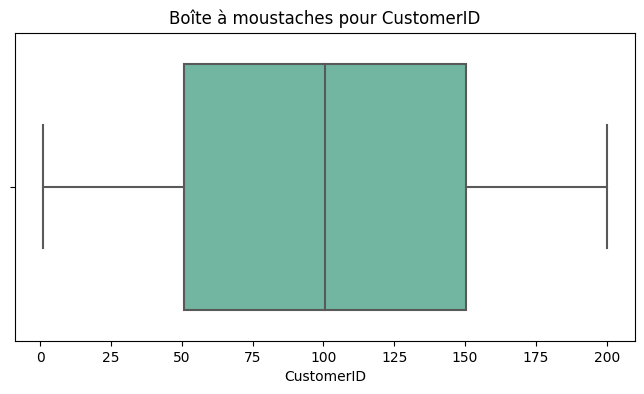

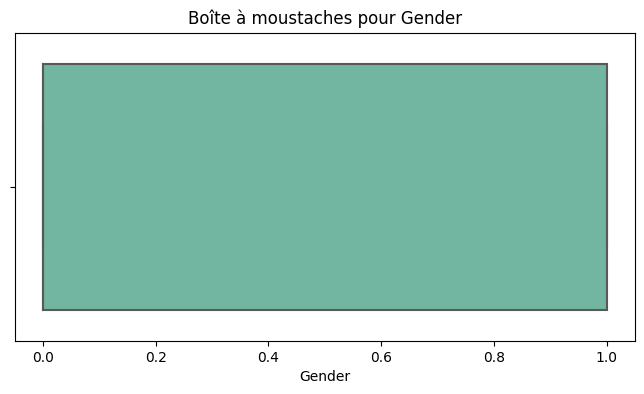

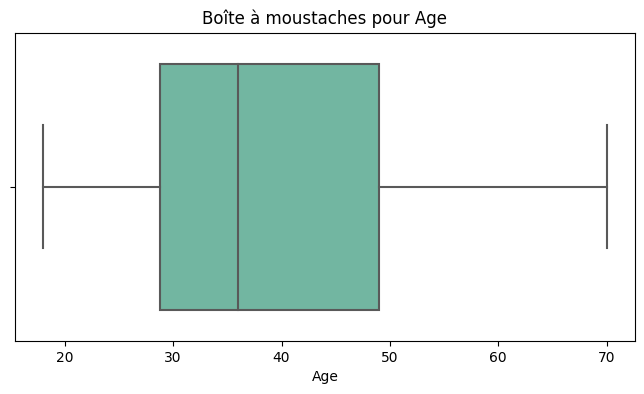

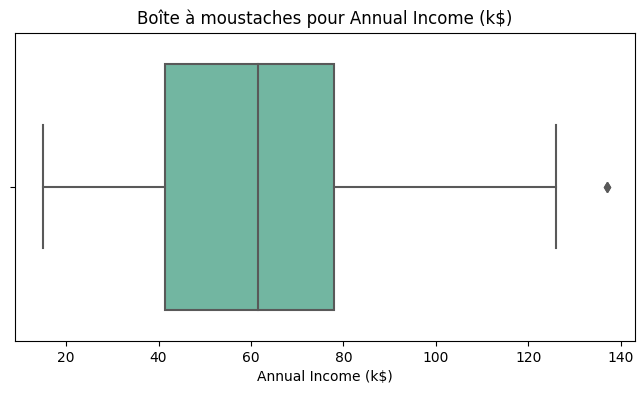

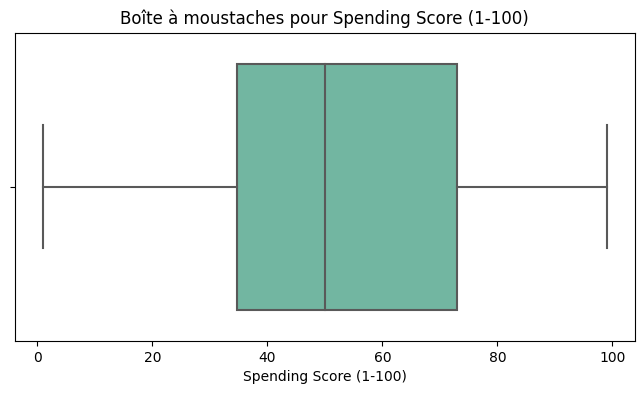

In [25]:
# Visualiser les valeurs aberrantes pour toutes les colonnes numériques
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], palette="Set2")
    plt.title(f"Boîte à moustaches pour {column}")
    plt.xlabel(column)
    plt.show()


In [26]:
# Calcul des quartiles et de l'IQR
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour identifier les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
data_filtered = data[(data['Annual Income (k$)'] >= lower_bound) & (data['Annual Income (k$)'] <= upper_bound)]

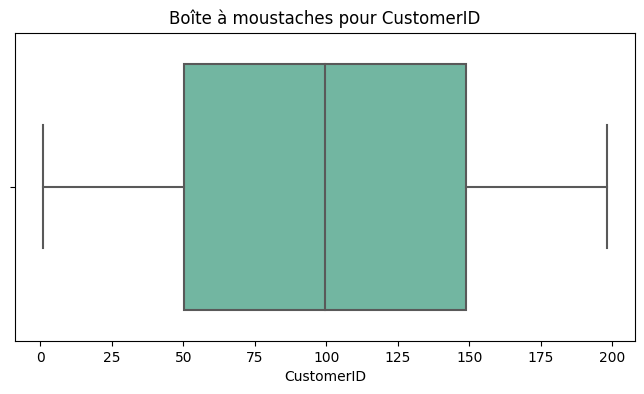

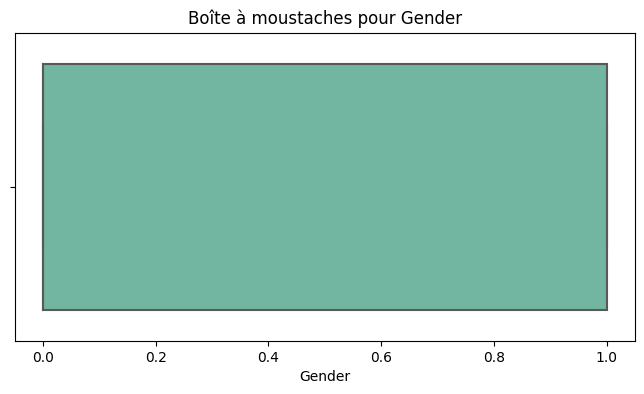

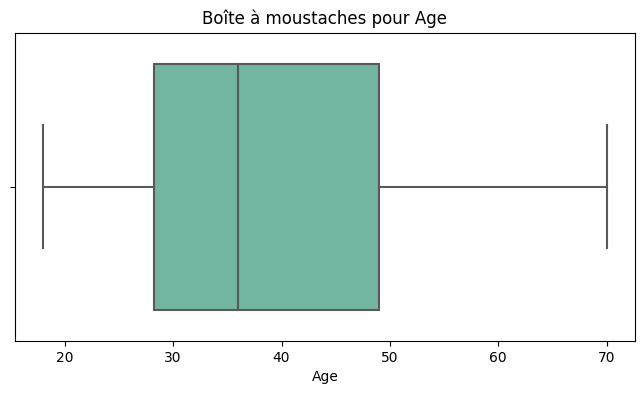

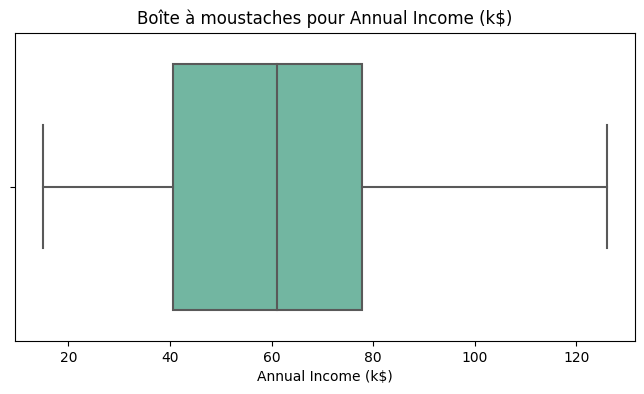

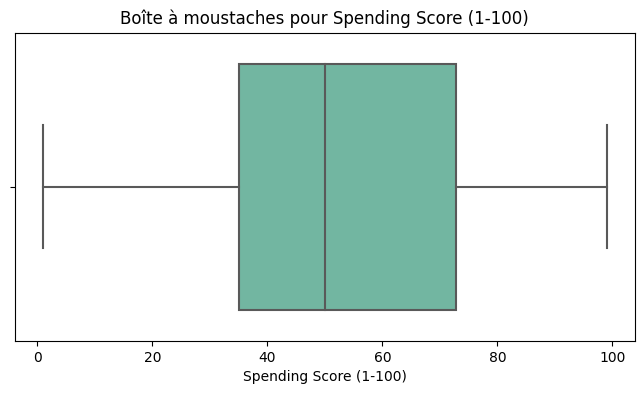

In [27]:
for column in data_filtered.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_filtered[column], palette="Set2")
    plt.title(f"Boîte à moustaches pour {column}")
    plt.xlabel(column)
    plt.show()

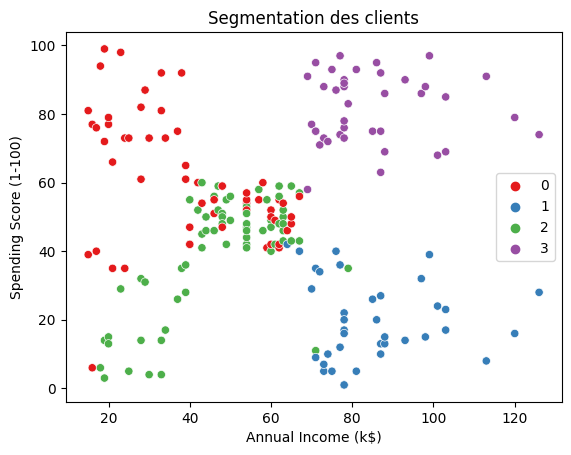

In [28]:
features = data=data_filtered[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaled_features = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=4, init='random', random_state=42, n_init=20)
cluster = kmeans.fit_predict(scaled_features)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster, data=data_filtered, palette='Set1')
plt.title('Segmentation des clients')
plt.show()
